# Summary

Model fitting on animals' choices. In the manuscript: **Fig. 2B**.

This notebook requires to run `analysis/model_fitting.py` first to fit models.

---
# Setup

In [1]:
# imports
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from popy.config import COLORS, PROJECT_PATH_LOCAL

In [2]:
# local functions
def load_res():
    # show bic and LPT values
    dfs = []
    for monkey in ['ka', 'po']:#:, 'yu_sham', 'yu_DCZ']:
        # load behavior data
        floc = os.path.join(PROJECT_PATH_LOCAL, 'data', 'results', 'model_fitting', f'simulation_results_{monkey}.csv')
        res_temp = pd.read_csv(floc)

        # add monkey name to the dataframe and move to first col
        res_temp['monkey'] = monkey
        

        dfs.append(res_temp)
    return pd.concat(dfs, ignore_index=True)

def plot_res(res_all, paper_format=False):
    # Set font size and figure size
    if paper_format:
        plt.rcParams.update({'font.size': 8})
        w, h = 4, 4
    else:
        plt.rcParams.update({'font.size': 8})
        w, h = 12, 5

    # Define the modes and figure
    modes = ['LPT_best']
    fig, axes = plt.subplots(2, 1, figsize=(w/2.54, h/2.54), gridspec_kw={'hspace': 0.3})

    # Get unique values
    models = res_all.loc[res_all['monkey'] != 'yu_DCZ', 'Model'].unique()
    monkeys = res_all.loc[res_all['monkey'] != 'yu_DCZ', 'monkey'].unique()

    # Iterate over the modes and plot
    for mode_idx, mode in enumerate(modes):
        # Set up positions
        x = np.arange(len(models))
        width = 0.65  # Width of bars

        for i, monkey in enumerate(monkeys):
            ax = axes[i]  # Use separate subplot for each monkey
            
            data = res_all.loc[(res_all['monkey'] == monkey) & (res_all['monkey'] != 'yu_DCZ')]
            values = [data.loc[data['Model'] == model, mode].iloc[0] if len(data.loc[data['Model'] == model]) > 0 else 0 for model in models]
            
            # Create bars with model-based coloring
            for j, (model, value) in enumerate(zip(models, values)):
                hatch = None
                if model.split()[0] == 'Standard':
                    # replace  what comes after with RL
                    color = COLORS['Standard RL']
                    if not model == 'Standard RL - stickyness':
                        hatch = '///'  # Dashed filling pattern
                elif model.split()[0] == 'Inferential':
                    color = COLORS['Inferential RL']
                    if not model == 'Inferential RL - stickyness':
                        hatch = '///'  # Dashed filling pattern
                elif model.split()[0] == 'Foraging':
                    color = COLORS['Foraging']
                    if not len(model.split(" ")) == 1:
                        hatch = '///'  # Dashed filling pattern
                else:
                    color = COLORS.get(model, 'grey')
                    hatch = None
                alpha = 0.8
                
                
                bar = ax.bar(x[j], value, width, 
                    color=color, hatch=hatch,
                    edgecolor='black', linewidth=0.5, alpha=alpha)
                
                # Set hatch color to grey for RL-s models
                if model.split()[-1] == 'RL-s':
                    import matplotlib as mpl
                    mpl.rcParams['hatch.color'] = 'grey'
            
            # add monkey name (capitalized) as title, y axis a bit lower
            ax.set_title(monkey.upper(), fontsize=10, y=.85)

            # Configure axes
            ax.set_ylim(0.33, 0.85)
            ax.set_yticks(np.arange(0.4, 0.9, 0.2))
            ax.set_ylabel('LPT', fontsize=8)
            
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)

            ax.grid(axis='y', linestyle='dotted', alpha=0.5, zorder=0)

            # Only add x-axis labels to bottom plot
            if i == len(monkeys) - 1:  # Bottom plot
                ax.set_xticks(x)
                ax.set_xticklabels(models, rotation=-90, horizontalalignment='center')
            else:  # Top plot
                ax.set_xticks(x)
                ax.set_xticklabels([])  # Remove x-axis labels from top plot

    return fig, axes


---
# Create figure

In [3]:
res_all = load_res()
#res_all

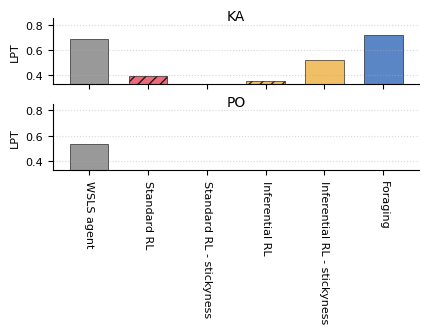

In [4]:
fig, ax = plot_res(res_all, paper_format=False)
plt.show()